<a href="https://colab.research.google.com/github/Pricylia/Topicos-Especiais/blob/main/Avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas-ods-reader
import pandas_ods_reader as pdos
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49003 sha256=1cd2c670e880e0f8d5dcfb63d273d14d9e0112d01a9fe2c1e735bf3d3c7e4adc
  Stored in directory: /root/.cache/pip/wheels/50/09/62/ea2c44e6ffdd067d6c8d3f557af0734a195bd252d6901f23ca
Successfully built ezodf


In [3]:
df = pdos.read_ods('dados.ods')
df

,unnamed.1,Fluxo Escolar - Label,Campus (Nome),Curso+Modalidade,Matrícula retida?,Ingressantes em (Período Letivo),Modalidade de Ensino,Modalidade do Curso,Nível de Ensino,Período Letivo,...,É ingressante? (rótulo),É matrícula retida neste período letivo?,Última Alteração de Situação,CH,CH. Disc. Obrigatórias,CH. Disc. Optativas,Duracao curso,Idade (Hoje),Periodos Cursados,Período Letivo da Mudança de Situação
0,0.0,Em Curso,Acaraú,LÍNGUA INGLESA,Dentro do prazo,20192.0,Presencial,Fic,Básico,2019/2,...,Ingressante,Não Retida,2019-11-07,160.0,160.0,0.0,2.0,35.0,1.0,2019/2
1,2.0,Evadidos,Acaraú,TÉCNICO EM AQUICULTURA (Subsequente),Dentro do prazo,20151.0,Presencial,Subsequente,Técnico,2015/2,...,Veterano,Não Retida,2016-02-26,1240.0,1240.0,0.0,4.0,28.0,2.0,2015/2
2,3.0,Formados,Acaraú,XADREZ BÁSICO,Dentro do prazo,20172.0,Presencial,Fic,Básico,2017/2,...,Ingressante,Não Retida,2018-05-16,60.0,60.0,0.0,1.0,22.0,1.0,2017/2
3,5.0,Formados,Acaraú,TÉCNICO EM EVENTOS (Subsequente),Fora do prazo,20172.0,Presencial,Subsequente,Técnico,2017/2,...,Ingressante,Não Retida,2018-11-09,800.0,800.0,0.0,2.0,23.0,2.0,None
4,7.0,Evadidos,Acaraú,LICENCIATURA EM CIÊNCIAS BIOLÓGICAS,Dentro do prazo,20152.0,Presencial,Licenciatura,Graduação,2016/1,...,Veterano,Não Retida,2016-12-01,2940.0,2860.0,80.0,8.0,23.0,2.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,8434.0,Formados,Acaraú,MATEMÁTICA BÁSICA,Dentro do prazo,20182.0,Presencial,Fic,Básico,2018/2,...,Ingressante,Não Retida,2019-05-09,40.0,40.0,0.0,1.0,21.0,1.0,2018/2
3316,8435.0,Em Curso,Acaraú,LÍNGUA INGLESA,Dentro do prazo,20192.0,Presencial,Fic,Básico,2019/2,...,Ingressante,Não Retida,2019-10-16,160.0,160.0,0.0,2.0,26.0,1.0,None
3317,8437.0,Evadidos,Acaraú,LÍNGUA INGLESA,Fora do prazo,20172.0,Presencial,Fic,Básico,2018/1,...,Veterano,Retida,2018-06-19,160.0,160.0,0.0,2.0,28.0,2.0,2018/1
3318,8443.0,Formados,Acaraú,TÉCNICO EM AQUICULTURA (Subsequente),Fora do prazo,20161.0,Presencial,Subsequente,Técnico,2018/2,...,Veterano,Retida,2018-12-28,1240.0,1240.0,0.0,4.0,22.0,6.0,2018/2


In [4]:
# Excluir colunas que possivelmente contenham datas
non_date_columns = [col for col in df if 'data' not in col.lower() and 'date' not in col.lower()]

# Filtrar o dataframe para as colunas que não contêm datas
df_non_date = df[non_date_columns]

# Exibir as colunas selecionadas
print("Colunas que não contêm datas:")
print(df_non_date.columns)

Colunas que não contêm datas:
Index(['unnamed.1', 'Fluxo Escolar - Label', 'Campus (Nome)',
       'Curso+Modalidade', 'Matrícula retida?',
       'Ingressantes em (Período Letivo)', 'Modalidade de Ensino',
       'Modalidade do Curso', 'Nível de Ensino', 'Período Letivo',
       'Tipo de Modalidade (grupo)', 'Campus', 'Cidade Aluno',
       'Cód. da Matriz', 'Cód. do Curso', 'Dt Ref Início Matrícula',
       'Dt Ref Início Período Letivo', 'Estado Aluno', 'Estrutura Etária',
       'Etnia', 'Faixa Etária', 'Forma de Ingresso', 'Forma de Oferta (grupo)',
       'Ingressantes em  (Ano Letivo)', 'Município do Campus', 'Município, UF',
       'Nivel de Ensino - sem hierar', 'Num Seq deste Período Letivo',
       'Periodo Letivo (Num)', 'Previsão de Término (Letivo)', 'Reserva vaga',
       'Sexo', 'Tipo de Modalidade', 'Tipo_Escola_Origem', 'É ingressante?',
       'É ingressante? (rótulo)', 'É matrícula retida neste período letivo?',
       'Última Alteração de Situação', 'CH', 'CH. Disc

# *Removendo os dados "Em Curso" e "Retidos"*

In [5]:
# Filtrar dados para excluir alunos "Em Curso" e "Retidos"
filtered_df = df[(df['Fluxo Escolar - Label'] != 'Em Curso') &
                   (df['Fluxo Escolar - Label'] != 'Retidos')]

# Verificar a contagem após a filtragem
filtered_counts = filtered_df['Fluxo Escolar - Label'].value_counts()
print("Contagem após a filtragem de alunos 'Em Curso' e 'Retidos':")
print(filtered_counts)

Contagem após a filtragem de alunos 'Em Curso' e 'Retidos':
Fluxo Escolar - Label
Evadidos    1452
Formados     765
Name: count, dtype: int64


In [6]:
# Exibir as primeiras linhas do DataFrame filtrado
filtered_df.head()

# Se quiser ver todas as linhas do DataFrame filtrado, use:
filtered_df

,unnamed.1,Fluxo Escolar - Label,Campus (Nome),Curso+Modalidade,Matrícula retida?,Ingressantes em (Período Letivo),Modalidade de Ensino,Modalidade do Curso,Nível de Ensino,Período Letivo,...,É ingressante? (rótulo),É matrícula retida neste período letivo?,Última Alteração de Situação,CH,CH. Disc. Obrigatórias,CH. Disc. Optativas,Duracao curso,Idade (Hoje),Periodos Cursados,Período Letivo da Mudança de Situação
1,2.0,Evadidos,Acaraú,TÉCNICO EM AQUICULTURA (Subsequente),Dentro do prazo,20151.0,Presencial,Subsequente,Técnico,2015/2,...,Veterano,Não Retida,2016-02-26,1240.0,1240.0,0.0,4.0,28.0,2.0,2015/2
2,3.0,Formados,Acaraú,XADREZ BÁSICO,Dentro do prazo,20172.0,Presencial,Fic,Básico,2017/2,...,Ingressante,Não Retida,2018-05-16,60.0,60.0,0.0,1.0,22.0,1.0,2017/2
3,5.0,Formados,Acaraú,TÉCNICO EM EVENTOS (Subsequente),Fora do prazo,20172.0,Presencial,Subsequente,Técnico,2017/2,...,Ingressante,Não Retida,2018-11-09,800.0,800.0,0.0,2.0,23.0,2.0,None
4,7.0,Evadidos,Acaraú,LICENCIATURA EM CIÊNCIAS BIOLÓGICAS,Dentro do prazo,20152.0,Presencial,Licenciatura,Graduação,2016/1,...,Veterano,Não Retida,2016-12-01,2940.0,2860.0,80.0,8.0,23.0,2.0,None
5,8.0,Formados,Acaraú,LÍNGUA ESPANHOLA,Dentro do prazo,20152.0,Presencial,Fic,Básico,2015/2,...,Ingressante,Não Retida,2016-05-27,60.0,60.0,0.0,1.0,23.0,1.0,2015/2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,8422.0,Evadidos,Acaraú,TÉCNICO EM PESCA (Subsequente),Dentro do prazo,20161.0,Presencial,Subsequente,Técnico,2016/2,...,Veterano,Não Retida,2017-05-12,1080.0,1080.0,0.0,4.0,23.0,2.0,2016/2
3315,8434.0,Formados,Acaraú,MATEMÁTICA BÁSICA,Dentro do prazo,20182.0,Presencial,Fic,Básico,2018/2,...,Ingressante,Não Retida,2019-05-09,40.0,40.0,0.0,1.0,21.0,1.0,2018/2
3317,8437.0,Evadidos,Acaraú,LÍNGUA INGLESA,Fora do prazo,20172.0,Presencial,Fic,Básico,2018/1,...,Veterano,Retida,2018-06-19,160.0,160.0,0.0,2.0,28.0,2.0,2018/1
3318,8443.0,Formados,Acaraú,TÉCNICO EM AQUICULTURA (Subsequente),Fora do prazo,20161.0,Presencial,Subsequente,Técnico,2018/2,...,Veterano,Retida,2018-12-28,1240.0,1240.0,0.0,4.0,22.0,6.0,2018/2


In [15]:
# Criando uma nova coluna binária 'Evadido'
filtered_df['Evadido'] = filtered_df['Fluxo Escolar - Label'].apply(lambda x: 1 if x == 'Evadidos' else 0)

# Exibir as primeiras linhas do DataFrame com a nova coluna 'Evadido'
filtered_df.head()

<ipython-input-15-08adab08a3eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Evadido'] = filtered_df['Fluxo Escolar - Label'].apply(lambda x: 1 if x == 'Evadidos' else 0)


,unnamed.1,Fluxo Escolar - Label,Campus (Nome),Curso+Modalidade,Matrícula retida?,Ingressantes em (Período Letivo),Modalidade de Ensino,Modalidade do Curso,Nível de Ensino,Período Letivo,...,É matrícula retida neste período letivo?,Última Alteração de Situação,CH,CH. Disc. Obrigatórias,CH. Disc. Optativas,Duracao curso,Idade (Hoje),Periodos Cursados,Período Letivo da Mudança de Situação,Evadido
1,2.0,Evadidos,Acaraú,TÉCNICO EM AQUICULTURA (Subsequente),Dentro do prazo,20151.0,Presencial,Subsequente,Técnico,2015/2,...,Não Retida,2016-02-26,1240.0,1240.0,0.0,4.0,28.0,2.0,2015/2,1
2,3.0,Formados,Acaraú,XADREZ BÁSICO,Dentro do prazo,20172.0,Presencial,Fic,Básico,2017/2,...,Não Retida,2018-05-16,60.0,60.0,0.0,1.0,22.0,1.0,2017/2,0
3,5.0,Formados,Acaraú,TÉCNICO EM EVENTOS (Subsequente),Fora do prazo,20172.0,Presencial,Subsequente,Técnico,2017/2,...,Não Retida,2018-11-09,800.0,800.0,0.0,2.0,23.0,2.0,None,0
4,7.0,Evadidos,Acaraú,LICENCIATURA EM CIÊNCIAS BIOLÓGICAS,Dentro do prazo,20152.0,Presencial,Licenciatura,Graduação,2016/1,...,Não Retida,2016-12-01,2940.0,2860.0,80.0,8.0,23.0,2.0,None,1
5,8.0,Formados,Acaraú,LÍNGUA ESPANHOLA,Dentro do prazo,20152.0,Presencial,Fic,Básico,2015/2,...,Não Retida,2016-05-27,60.0,60.0,0.0,1.0,23.0,1.0,2015/2,0


# *Filtrando os 08 melhores dados*

In [8]:
# Selecionando apenas as colunas numéricas
numeric_columns = filtered_df.select_dtypes(include=['number']).columns

# Criando um DataFrame apenas com as colunas numéricas
filtered_df_numeric = filtered_df[numeric_columns]

In [9]:
# Calculando a correlação entre todas as colunas numéricas e a variável 'Evadido'
correlation_matrix = filtered_df_numeric.corr()

# Exibindo a correlação da coluna 'Evadido' com as outras colunas
relevant_correlations = correlation_matrix['Evadido'].sort_values(ascending=False)

# Selecionando as top 8 colunas com maior correlação
top_8_features = relevant_correlations.index[1:9]  # [1:9] para ignorar a correlação de 'Evadido' consigo mesmo

# Exibindo as top 8 colunas
print("Top 8 colunas com maior correlação com 'Evadido':")
print(top_8_features)

Top 8 colunas com maior correlação com 'Evadido':
Index(['CH. Disc. Obrigatórias', 'CH', 'Duracao curso', 'Periodo Letivo (Num)',
       'Periodos Cursados', 'Ingressantes em  (Ano Letivo)',
       'Ingressantes em (Período Letivo)', 'CH. Disc. Optativas'],
      dtype='object')


# *Dados após filtro e Matriz de Correlação*

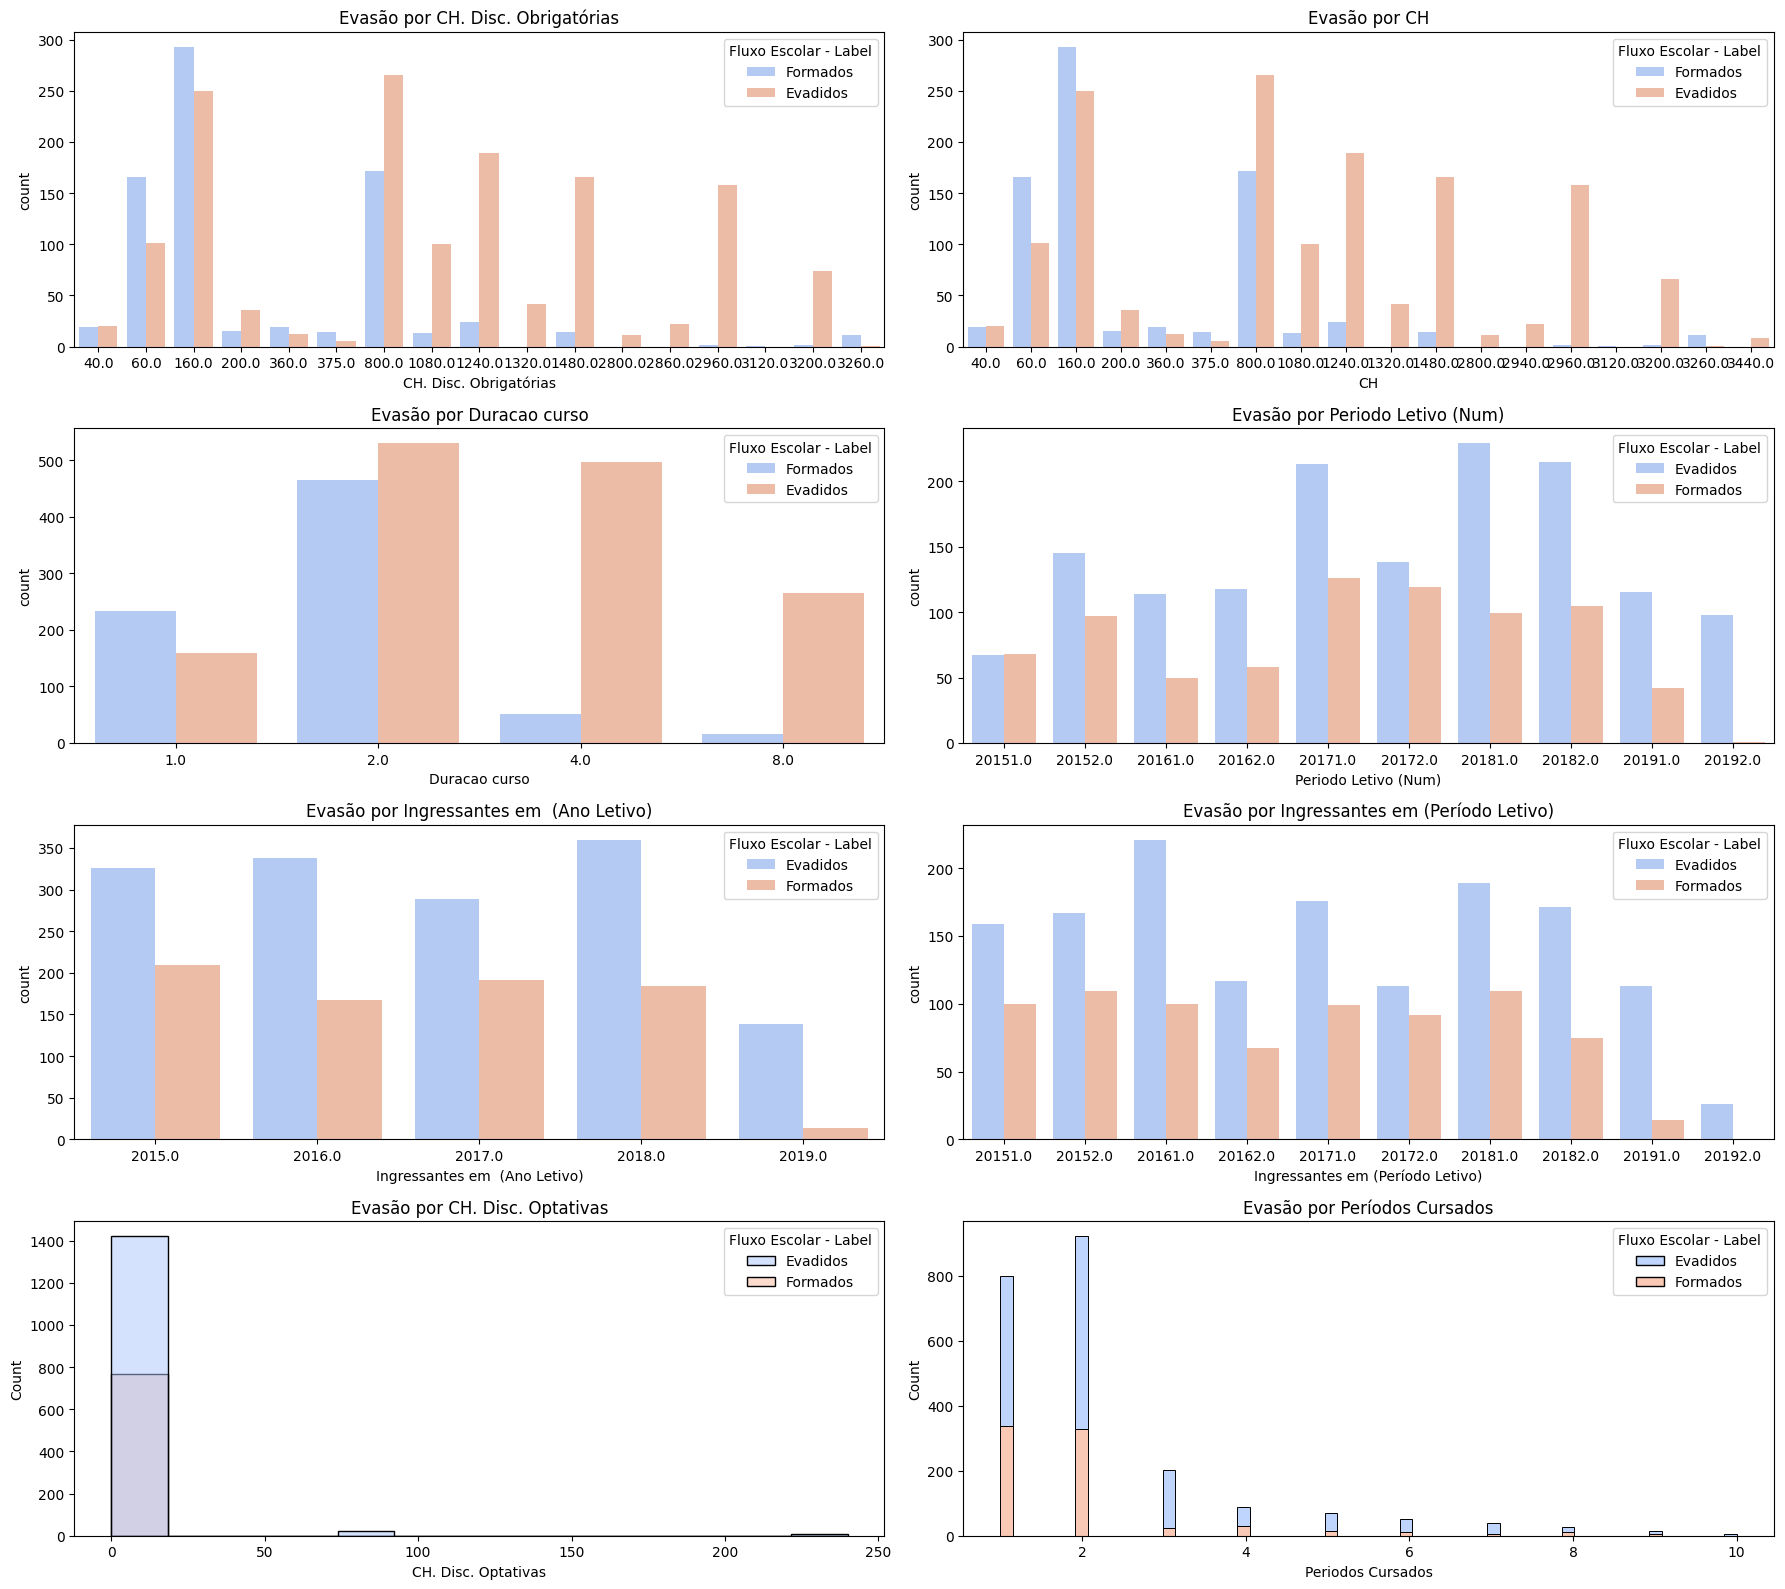

In [10]:
# Visualizar a relação entre 'Fluxo Escolar - Label' e algumas colunas categóricas e numéricas
fig, axes = plt.subplots(4, 2, figsize=(18, 16))

sns.countplot(data=filtered_df, x='CH. Disc. Obrigatórias', hue='Fluxo Escolar - Label', ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Evasão por CH. Disc. Obrigatórias')

sns.countplot(data=filtered_df, x='CH', hue='Fluxo Escolar - Label', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Evasão por CH')

sns.countplot(data=filtered_df, x='Duracao curso', hue='Fluxo Escolar - Label', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Evasão por Duracao curso')

sns.countplot(data=filtered_df, x='Periodo Letivo (Num)', hue='Fluxo Escolar - Label', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Evasão por Periodo Letivo (Num)')

sns.histplot(data=filtered_df, x='Periodos Cursados', hue='Fluxo Escolar - Label', multiple='stack', ax=axes[3, 1], palette='coolwarm')
axes[3, 1].set_title('Evasão por Períodos Cursados')

sns.countplot(data=filtered_df, x='Ingressantes em  (Ano Letivo)', hue='Fluxo Escolar - Label', ax=axes[2, 0], palette='coolwarm')
axes[2, 0].set_title('Evasão por Ingressantes em  (Ano Letivo)')

sns.countplot(data=filtered_df, x='Ingressantes em (Período Letivo)', hue='Fluxo Escolar - Label', ax=axes[2, 1], palette='coolwarm')
axes[2, 1].set_title('Evasão por Ingressantes em (Período Letivo)')

# Adicionando gráficos de Idade (Hoje) e Períodos Cursados
sns.histplot(data=filtered_df, x='CH. Disc. Optativas', hue='Fluxo Escolar - Label', ax=axes[3, 0], palette='coolwarm')
axes[3, 0].set_title('Evasão por CH. Disc. Optativas')

plt.tight_layout()
plt.show()

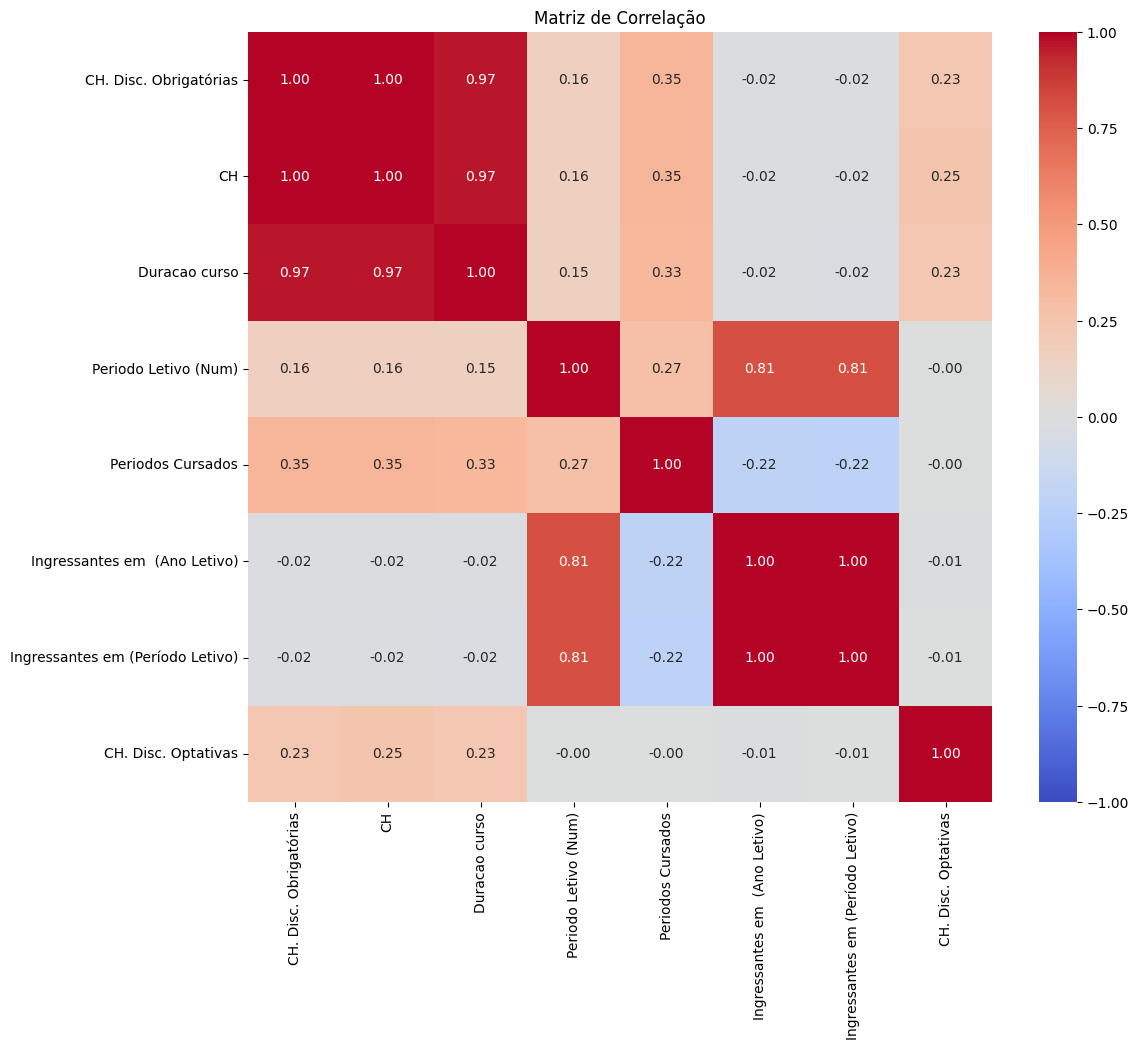

In [11]:
# Lista das colunas a serem usadas para a matriz de correlação
relevant_columns = ['CH. Disc. Obrigatórias', 'CH', 'Duracao curso', 'Periodo Letivo (Num)',
       'Periodos Cursados', 'Ingressantes em  (Ano Letivo)',
       'Ingressantes em (Período Letivo)', 'CH. Disc. Optativas']

# Criar um DataFrame apenas com as colunas relevantes
df_relevant_columns = filtered_df[relevant_columns]

# Aplicar Label Encoding para converter colunas categóricas em valores numéricos
label_encoder = LabelEncoder()
for col in df_relevant_columns.select_dtypes(include=['object']).columns:
    df_relevant_columns[col] = label_encoder.fit_transform(df_relevant_columns[col])

# Gerar a matriz de correlação
correlation_matrix = df_relevant_columns.corr()

# Exibir a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()

# *Selecionando dados para teste*

In [12]:
# Seleção das colunas relevantes
selected_columns = ['CH. Disc. Obrigatórias', 'CH', 'Duracao curso', 'Fluxo Escolar - Label']

df_selected = filtered_df[selected_columns]

print("Dados selecionados:")
display(df_selected.head())

Dados selecionados:


,CH. Disc. Obrigatórias,CH,Duracao curso,Fluxo Escolar - Label
1,1240.0,1240.0,4.0,Evadidos
2,60.0,60.0,1.0,Formados
3,800.0,800.0,2.0,Formados
4,2860.0,2940.0,8.0,Evadidos
5,60.0,60.0,1.0,Formados


# *Codificando as variáveis categóricas*

In [14]:
# Verificar se há colunas categóricas no df_selected
categorical_columns = df_selected.select_dtypes(include=['object']).columns

# Aplicar Label Encoding em cada coluna categórica
for col in categorical_columns:
    df_selected[col] = label_encoder.fit_transform(df_selected[col])

print("Dados após Label Encoding:")
display(df_selected.head())

Dados após Label Encoding:


,CH. Disc. Obrigatórias,CH,Duracao curso,Fluxo Escolar - Label
1,1240.0,1240.0,4.0,0
2,60.0,60.0,1.0,1
3,800.0,800.0,2.0,1
4,2860.0,2940.0,8.0,0
5,60.0,60.0,1.0,1


In [16]:
# Variável dependente (alvo)
y = df_selected['Fluxo Escolar - Label']

# Variáveis independentes (características)
X = df_selected.drop(columns=['Fluxo Escolar - Label'])

# *Dividindo os dados e treinando o modelo KNN*

In [17]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar as variáveis independentes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo usando KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a acurácia (percentual de evasão correta)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

print(f"Percentual de acurácia: {accuracy_percentage:.2f}%")

Percentual de acurácia: 72.07%


# *Gerando a matriz de confusão para o KNN*

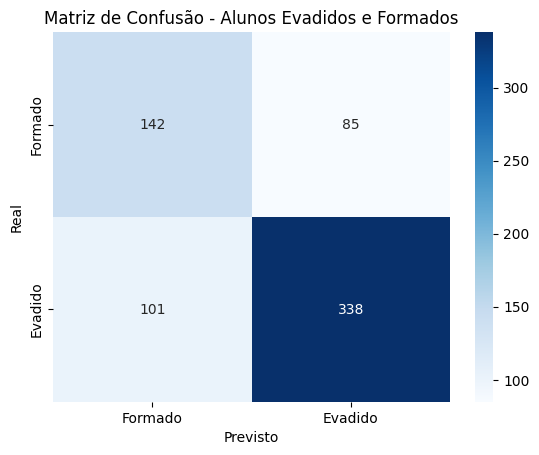

In [19]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 1 para "Formado", 0 para "Evadido"

# Exibir a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Formado', 'Evadido'], yticklabels=['Formado', 'Evadido'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title("Matriz de Confusão - Alunos Evadidos e Formados")
plt.show()

# *Conclusão*
